<a href="https://colab.research.google.com/github/Ibrahim-Opeyemi/Undergraduate_Project/blob/main/Earthquake_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEVELOPMENT AND INVESTIGATION OF EARTHQUAKE FORECASTING MODEL USING MACHINE LEARNING ALGORITHM (LightGBM) FOR AFRICA TECTONIC PLATE

- ### Importing required packages

In [ ]:
!pip install Cartopy
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for Cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102750 sha256=111158f954bb67662fe88475453f25bbc46c7edbdf14f5556f5759ae84cb6711
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built Cartopy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import geopandas as gpd
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

### 1. Data Collection and Preprocessing

In [ ]:
# Load the earthquake data into a Pandas DataFrame
df = pd.read_csv('./Earthquake_Africa (2000-2023).csv')

In [ ]:
# Checking the size and shape of the dataset
print('The Earthquake Database data shape :', df.shape)

The Earthquake Database data shape : (18532, 22)


In [ ]:
# Checking the datatypes of the columns

df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [ ]:
# This displays a concise summary of the dataframe, including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18532 entries, 0 to 18531
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             18532 non-null  object 
 1   latitude         18532 non-null  float64
 2   longitude        18532 non-null  float64
 3   depth            18532 non-null  float64
 4   mag              18532 non-null  float64
 5   magType          18532 non-null  object 
 6   nst              13944 non-null  float64
 7   gap              16186 non-null  float64
 8   dmin             4608 non-null   float64
 9   rms              9547 non-null   float64
 10  net              18532 non-null  object 
 11  id               18532 non-null  object 
 12  updated          18532 non-null  object 
 13  place            18490 non-null  object 
 14  type             18532 non-null  object 
 15  horizontalError  4490 non-null   float64
 16  depthError       5934 non-null   float64
 17  magError    

In [ ]:
df.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-29T14:07:02.339Z,13.2039,51.0051,10.0,4.7,mb,46.0,96.0,8.143,0.87,us,us7000jwyx,2023-05-20T19:56:30.040Z,"139 km N of Caluula, Somalia",earthquake,11.82,1.892,0.081,46.0,reviewed,us,us
1,2023-04-28T05:15:44.377Z,36.1028,36.0439,10.0,4.1,mb,34.0,110.0,1.421,0.99,us,us7000jwk7,2023-05-10T05:13:26.040Z,"3 km WSW of Büyükçat, Turkey",earthquake,5.77,1.939,0.114,21.0,reviewed,us,us
2,2023-04-26T21:06:56.152Z,34.3892,45.2965,10.0,4.2,mb,33.0,65.0,1.188,0.64,us,us7000jxrp,2023-05-17T00:09:16.040Z,"45 km SE of Kifr?, Iraq",earthquake,6.08,1.909,0.159,11.0,reviewed,us,us


In [ ]:
# Performing data cleaning and filtering

# Convert categorical variables to numerical representations if needed
# df['place'] = df['place'].astype('category').cat.codes
df['place'] = df['place'].astype('category')

# Displaying the total number of null (missing) values in each column
missing_values = df.isnull().sum()
print (f'Shape of df is: {df.shape}, \n')
print(missing_values)

Shape of df is: (18532, 22), 

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 4588
gap                 2346
dmin               13924
rms                 8985
net                    0
id                     0
updated                0
place                 42
type                   0
horizontalError    14042
depthError         12598
magError           13632
magNst              9631
status                 0
locationSource         0
magSource              0
dtype: int64


In [ ]:
# Create a Cartopy map projection
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)
ax.add_feature(cartopy.feature.STATES, linestyle='-', alpha=0.5)

# Plot earthquake locations
scatter = ax.scatter(df['longitude'], df['latitude'], c=df['mag'], cmap='cool', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(scatter, orientation='vertical', shrink=0.5)
cbar.set_label("Magnitude")

# Show the plot
plt.show()

In [ ]:
# Removing duplicate entries
df = df.drop_duplicates()

## Convert to Geodataframe

In [ ]:
df = gpd.GeoDataFrame(data=df, geometry = gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
print (f"type of dataframe is: {type(df)} \n")
df.head(2)



type of dataframe is: <class 'geopandas.geodataframe.GeoDataFrame'> 



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2023-04-29T14:07:02.339Z,13.2039,51.0051,10.0,4.7,mb,46.0,96.0,8.143,0.87,us,us7000jwyx,2023-05-20T19:56:30.040Z,"139 km N of Caluula, Somalia",earthquake,11.82,1.892,0.081,46.0,reviewed,us,us,POINT (51.00510 13.20390)
1,2023-04-28T05:15:44.377Z,36.1028,36.0439,10.0,4.1,mb,34.0,110.0,1.421,0.99,us,us7000jwk7,2023-05-10T05:13:26.040Z,"3 km WSW of Büyükçat, Turkey",earthquake,5.77,1.939,0.114,21.0,reviewed,us,us,POINT (36.04390 36.10280)


In [ ]:
df['status'].value_counts()

reviewed     18527
automatic        5
Name: status, dtype: int64

In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'geometry'],
      dtype='object')

In [ ]:
df.drop(columns= ['type', 'id', 'status'], inplace=True)

In [ ]:
df.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,locationSource,magSource,geometry
0,2023-04-29T14:07:02.339Z,13.2039,51.0051,10.0,4.7,mb,46.0,96.0,8.143,0.87,us,2023-05-20T19:56:30.040Z,"139 km N of Caluula, Somalia",11.82,1.892,0.081,46.0,us,us,POINT (51.00510 13.20390)
1,2023-04-28T05:15:44.377Z,36.1028,36.0439,10.0,4.1,mb,34.0,110.0,1.421,0.99,us,2023-05-10T05:13:26.040Z,"3 km WSW of Büyükçat, Turkey",5.77,1.939,0.114,21.0,us,us,POINT (36.04390 36.10280)


In [ ]:
# This returns useful descriptive statistics for each column of data
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,18532.000000,18532.00000,18532.000000,18532.000000,13944.000000,16186.000000,4608.000000,9547.000000,4490.000000,5934.000000,4900.000000,8901.000000
mean,25.108610,22.53505,17.277306,3.986343,33.838425,150.375553,4.566362,0.927900,7.517171,3.831400,0.133676,24.660825
std,18.864778,18.43531,18.164760,0.638118,57.967065,80.551940,5.983071,0.280688,2.801864,4.607698,0.072003,33.052918
min,-35.000000,-17.99550,0.000000,3.000000,3.000000,14.000000,0.024000,0.000000,1.500000,0.000000,0.026000,1.000000
25%,28.160000,21.36000,10.000000,3.400000,6.000000,80.300000,1.097750,0.740000,5.500000,1.900000,0.083750,6.000000
50%,34.925000,25.75000,10.000000,4.000000,14.000000,132.550000,2.447955,0.930000,7.100000,1.900000,0.118000,14.000000
75%,35.960000,32.22265,23.000000,4.400000,36.000000,218.800000,6.049750,1.120000,9.200000,4.700000,0.166000,30.000000
max,37.000000,51.99940,609.800000,7.300000,786.000000,351.900000,42.146000,4.140000,28.900000,65.500000,0.546000,473.000000


In [ ]:
# Using the duplicated function to see which rows are duplicates
df.duplicated().sum()

0

In [ ]:
# Displaying the count of the duplicates in the data set
sum(df.duplicated())

0

In [ ]:
# This returns the number of unique values in each column
df.nunique()

time               18532
latitude            9976
longitude          12004
depth               1558
mag                   43
magType               13
nst                  388
gap                 2968
dmin                3404
rms                  186
net                    2
updated            17378
place              12562
horizontalError      502
depthError           542
magError             312
magNst               224
locationSource        29
magSource             30
geometry           18220
dtype: int64

### 2. Feature Engineering

In [ ]:
# Converting 'time' column to datetime type
# df['time'] = pd.to_datetime(df['time'])
df['time'] = pd.to_datetime(df.time)
df['updated'] = pd.to_datetime(df.updated)
df.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,locationSource,magSource,geometry
0,2023-04-29 14:07:02.339000+00:00,13.2039,51.0051,10.0,4.7,mb,46.0,96.0,8.143,0.87,us,2023-05-20 19:56:30.040000+00:00,"139 km N of Caluula, Somalia",11.82,1.892,0.081,46.0,us,us,POINT (51.00510 13.20390)
1,2023-04-28 05:15:44.377000+00:00,36.1028,36.0439,10.0,4.1,mb,34.0,110.0,1.421,0.99,us,2023-05-10 05:13:26.040000+00:00,"3 km WSW of Büyükçat, Turkey",5.77,1.939,0.114,21.0,us,us,POINT (36.04390 36.10280)


##### Extracting useful features from the 'timestamp' column that can be used as numerical features in the model:

In [ ]:
# Extracting relevant features from the earthquake data
# Extracting year, month, day, hour, minute, and second from 'timestamp'
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day_of_week'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

In [ ]:
# Dropping the original 'time' column
# df.drop(columns=['time', 'id', 'updated'], inplace=True)

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

# Handle missing values, either by filling or dropping rows/columns
# For example, to drop rows with missing values:

# df.dropna(inplace=True)
df.fillna(value=df.mean(), inplace=True)

# Alternatively, you can fill missing values with a specific value or impute them.

In [ ]:
df.isna().sum()

time                0
latitude            0
longitude           0
depth               0
mag                 0
magType             0
nst                 0
gap                 0
dmin                0
rms                 0
net                 0
updated             0
place              42
horizontalError     0
depthError          0
magError            0
magNst              0
locationSource      0
magSource           0
geometry            0
year                0
month               0
day_of_week         0
hour                0
minute              0
second              0
dtype: int64

In [ ]:
# Calculate magnitude-frequency relationship feature
df['log_magnitude'] = np.log10(df['mag'])

# Include historical seismicity feature
df['prior_earthquakes'] = df.groupby('place')['time'].cumcount()

In [ ]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,locationSource,magSource,geometry,year,month,day_of_week,hour,minute,second,log_magnitude,prior_earthquakes
0,2023-04-29 14:07:02.339000+00:00,13.2039,51.0051,10.000,4.7,mb,46.000000,96.000000,8.143000,0.8700,us,2023-05-20 19:56:30.040000+00:00,"139 km N of Caluula, Somalia",11.820000,1.8920,0.081000,46.000000,us,us,POINT (51.00510 13.20390),2023,4,29,14,7,2,0.672098,0.0
1,2023-04-28 05:15:44.377000+00:00,36.1028,36.0439,10.000,4.1,mb,34.000000,110.000000,1.421000,0.9900,us,2023-05-10 05:13:26.040000+00:00,"3 km WSW of Büyükçat, Turkey",5.770000,1.9390,0.114000,21.000000,us,us,POINT (36.04390 36.10280),2023,4,28,5,15,44,0.612784,0.0
2,2023-04-26 21:06:56.152000+00:00,34.3892,45.2965,10.000,4.2,mb,33.000000,65.000000,1.188000,0.6400,us,2023-05-17 00:09:16.040000+00:00,"45 km SE of Kifr?, Iraq",6.080000,1.9090,0.159000,11.000000,us,us,POINT (45.29650 34.38920),2023,4,26,21,6,56,0.623249,0.0
3,2023-04-26 20:00:34.403000+00:00,36.4294,26.3125,112.195,5.1,mww,117.000000,35.000000,1.476000,0.7600,us,2023-05-31 20:17:29.040000+00:00,"13 km SSW of Astypálaia, Greece",5.720000,4.2440,0.050000,38.000000,us,us,POINT (26.31250 36.42940),2023,4,26,20,0,34,0.707570,0.0
4,2023-04-26 05:18:06.962000+00:00,34.3883,45.3815,16.319,4.1,mb,34.000000,105.000000,1.187000,1.1500,us,2023-05-25 09:56:47.040000+00:00,"44 km W of Sarpol-e Z̄ahāb, Iran",8.380000,5.2540,0.158000,11.000000,us,us,POINT (45.38150 34.38830),2023,4,26,5,18,6,0.612784,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18527,2000-01-04 00:25:05.850000+00:00,-16.1340,35.9590,10.000,4.9,mb,33.838425,150.375553,4.566362,0.9600,us,2022-04-29 18:28:06.810000+00:00,"49 km SE of Phalombe, Malawi",7.517171,3.8314,0.133676,14.000000,us,us,POINT (35.95900 -16.13400),2000,1,4,0,25,5,0.690196,0.0
18528,2000-01-02 19:15:40.200000+00:00,36.1400,23.1400,5.000,3.1,md,33.838425,150.375553,4.566362,0.9279,us,2014-11-07 01:09:16.698000+00:00,"13 km E of Kýthira, Greece",7.517171,3.8314,0.133676,24.660825,ath,ath,POINT (23.14000 36.14000),2000,1,2,19,15,40,0.491362,0.0
18529,2000-01-02 18:48:55.600000+00:00,35.4800,22.5100,32.000,3.9,mb,33.838425,150.375553,4.566362,0.9279,us,2014-11-07 01:09:16.674000+00:00,"86 km SSW of Kýthira, Greece",7.517171,3.8314,0.133676,18.000000,ath,us,POINT (22.51000 35.48000),2000,1,2,18,48,55,0.591065,1.0
18530,2000-01-01 19:09:04.100000+00:00,35.6700,23.0900,16.000,3.4,md,33.838425,150.375553,4.566362,0.9279,us,2014-11-07 01:09:15.863000+00:00,"53 km S of Kýthira, Greece",7.517171,3.8314,0.133676,24.660825,ath,ath,POINT (23.09000 35.67000),2000,1,1,19,9,4,0.531479,0.0


### 3. Exploratory Data Analysis (EDA)

In [ ]:
mg =df.groupby('month')['mag'].count()
mg

month
1     1402
2     1782
3     1811
4     1492
5     1818
6     1705
7     1531
8     1578
9     1398
10    1255
11    1404
12    1356
Name: mag, dtype: int64

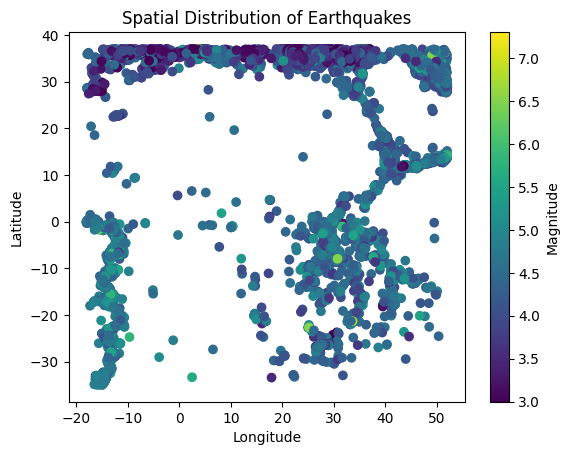

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the spatial distribution of earthquakes
plt.scatter(df['longitude'], df['latitude'], c=df['mag'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Magnitude')
plt.title('Spatial Distribution of Earthquakes')
plt.show()

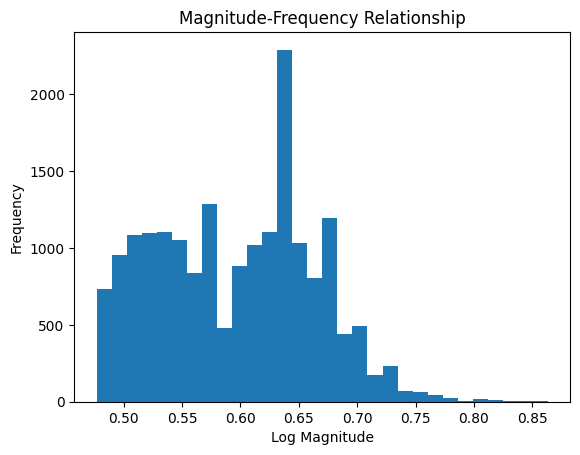

In [ ]:
# Ploting magnitude-frequency relationship
plt.hist(df['log_magnitude'], bins=30)
plt.xlabel('Log Magnitude')
plt.ylabel('Frequency')
plt.title('Magnitude-Frequency Relationship')
plt.show()

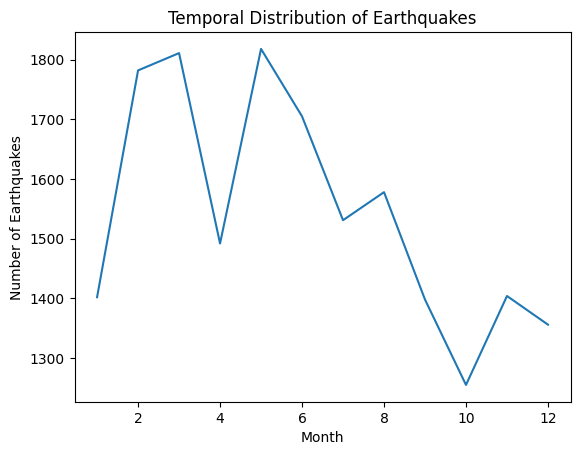

In [ ]:
# Analyze temporal patterns of earthquakes
monthly_counts = df.groupby('month')['mag'].count()
plt.plot(monthly_counts)
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.title('Temporal Distribution of Earthquakes')
plt.show()

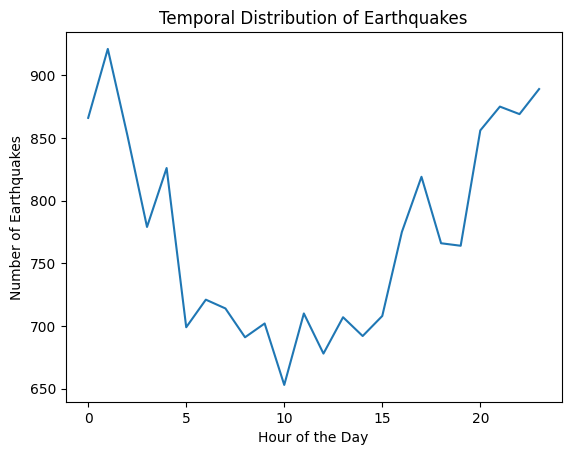

In [ ]:
# Analyze temporal patterns of earthquakes
hourly_counts = df.groupby('hour')['mag'].count()
plt.plot(hourly_counts)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Earthquakes')
plt.title('Temporal Distribution of Earthquakes')
plt.show()

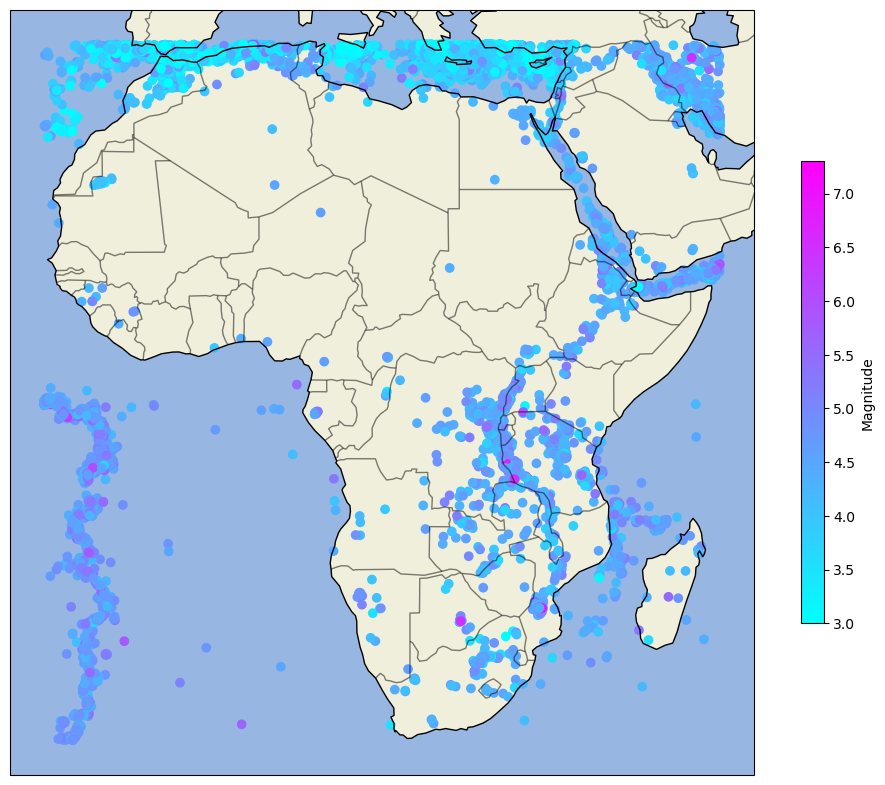

In [ ]:
# Visualizing the spatial distribution of earthquakes

# Create a Cartopy map projection
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)
ax.add_feature(cartopy.feature.STATES, linestyle='-', alpha=0.5)

# Plot earthquake locations
scatter = ax.scatter(df['longitude'], df['latitude'], c=df['mag'], cmap='cool', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(scatter, orientation='vertical', shrink=0.5)
cbar.set_label("Magnitude")

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Earthquakes')

# Show the plot
plt.show()

### 4. Machine Learning Algorithms Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regression model
model = RandomForestRegressor()

### 5. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df.iloc[:, :-1],  # Features (excluding the target variable)
    df['log_magnitude'],  # Target variable
    test_size=0.2,
    random_state=42
)

# Further split the training set for validation purposes
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data,
    train_labels,
    test_size=0.2,
    random_state=42
)

In [ ]:
df.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,horizontalError,depthError,magError,magNst,locationSource,magSource,geometry,year,month,day_of_week,hour,minute,second,log_magnitude,prior_earthquakes
0,2023-04-29 14:07:02.339000+00:00,13.2039,51.0051,10.0,4.7,mb,46.0,96.0,8.143,0.87,us,2023-05-20 19:56:30.040000+00:00,"139 km N of Caluula, Somalia",11.82,1.892,0.081,46.0,us,us,POINT (51.00510 13.20390),2023,4,29,14,7,2,0.672098,0.0
1,2023-04-28 05:15:44.377000+00:00,36.1028,36.0439,10.0,4.1,mb,34.0,110.0,1.421,0.99,us,2023-05-10 05:13:26.040000+00:00,"3 km WSW of Büyükçat, Turkey",5.77,1.939,0.114,21.0,us,us,POINT (36.04390 36.10280),2023,4,28,5,15,44,0.612784,0.0


In [ ]:
df.drop(columns=['time', 'geometry', 'updated', 'place'], inplace=True)
obj_cols = ['magType', 'net', 'locationSource', 'magSource']

for objs in obj_cols:
   if df[objs].dtype == 'object':
    df[objs] = df[objs].astype('category').cat.codes

In [ ]:
df.head(2)

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,horizontalError,depthError,magError,magNst,locationSource,magSource,year,month,day_of_week,hour,minute,second,log_magnitude,prior_earthquakes
0,13.2039,51.0051,10.0,4.7,2,46.0,96.0,8.143,0.87,1,11.82,1.892,0.081,46.0,22,29,2023,4,29,14,7,2,0.672098,0.0
1,36.1028,36.0439,10.0,4.1,2,34.0,110.0,1.421,0.99,1,5.77,1.939,0.114,21.0,22,29,2023,4,28,5,15,44,0.612784,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df[['longitude', 'latitude', 'depth', 'hour', 'day_of_week']],
    df['mag'],
    test_size=0.2,
    random_state=42
)

# Further split the training set for validation purposes
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data,
    train_labels,
    test_size=0.2,
    random_state=42
)

### 6. Model Training and Hyperparameter Tuning

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [ ]:
param_test ={'num_leaves': sp_randint(10, 40),
             'min_child_samples': sp_randint(100, 500),
             'min_child_weight': [1e-5, 1e-3,  1e-1, 1, 1e1, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8),
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 10, 20, 50, 100]}

n_HP_points_to_test = 100

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMRegressor(max_depth=-1, random_state=123, silent=True,
                         metrics=['logloss', 'mean_squared_error', 'mean_absolute_error'],
                         n_jobs=-1, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test,
    n_iter=n_HP_points_to_test,
    scoring='accuracy',
    cv=3,
    refit=True,
    random_state=123,n_jobs=-1,verbose=1)

In [ ]:
# import sklearn.metrics
# sklearn.metrics.get_scorer_names()

## The Next cell takes 24 minutes to run!

Wait a bit!

In [ ]:
%%time
evalset = [(train_data, train_labels), (val_data,val_labels)]
gs.fit( X=train_data, y=train_labels, eval_set=evalset )
gs.best_estimator_

Streaming output truncated to the last 5000 lines.
[3]	training's l2: 0.326561	training's l1: 0.474194	valid_1's l2: 0.321724	valid_1's l1: 0.469394
[4]	training's l2: 0.309353	training's l1: 0.457933	valid_1's l2: 0.305208	valid_1's l1: 0.453841
[5]	training's l2: 0.2925	training's l1: 0.442357	valid_1's l2: 0.289714	valid_1's l1: 0.439137
[6]	training's l2: 0.277917	training's l1: 0.428031	valid_1's l2: 0.276063	valid_1's l1: 0.425484
[7]	training's l2: 0.268142	training's l1: 0.417256	valid_1's l2: 0.266897	valid_1's l1: 0.415375
[8]	training's l2: 0.257848	training's l1: 0.40628	valid_1's l2: 0.257434	valid_1's l1: 0.405284
[9]	training's l2: 0.251314	training's l1: 0.398594	valid_1's l2: 0.251403	valid_1's l1: 0.398152
[10]	training's l2: 0.244196	training's l1: 0.390654	valid_1's l2: 0.245212	valid_1's l1: 0.391202
[11]	training's l2: 0.238108	training's l1: 0.383521	valid_1's l2: 0.239562	valid_1's l1: 0.384679
[12]	training's l2: 0.233132	training's l1: 0.377534	valid_1's l2: 0

LGBMRegressor(colsample_bytree=0.817881511358717,
              metrics=['logloss', 'mean_squared_error', 'mean_absolute_error'],
              min_child_samples=482, min_child_weight=0.1, n_estimators=5000,
              num_leaves=38, random_state=123, reg_alpha=1, reg_lambda=0.1,
              silent=True, subsample=0.7755751758284506)

In [ ]:
gs.best_estimator_.metrics

['logloss', 'mean_squared_error', 'mean_absolute_error']

In [ ]:
%%time

lgb_model = lgb.LGBMRegressor(colsample_bytree=0.817881511358717,
                                metrics=['logloss', 'mean_squared_error', 'mean_absolute_error'],
                                min_child_samples=482, min_child_weight=0.1, n_estimators=5000,
                                num_leaves=38, random_state=123, reg_alpha=1, reg_lambda=0.1,
                                silent=True, subsample=0.7755751758284506
                               )

evalset = [(train_data, train_labels), (val_data,val_labels)]
lgb_model.fit(X=train_data, y=train_labels, eval_set=evalset )

Streaming output truncated to the last 5000 lines.
[3]	training's l2: 0.326561	training's l1: 0.474194	valid_1's l2: 0.321724	valid_1's l1: 0.469394
[4]	training's l2: 0.309353	training's l1: 0.457933	valid_1's l2: 0.305208	valid_1's l1: 0.453841
[5]	training's l2: 0.2925	training's l1: 0.442357	valid_1's l2: 0.289714	valid_1's l1: 0.439137
[6]	training's l2: 0.277917	training's l1: 0.428031	valid_1's l2: 0.276063	valid_1's l1: 0.425484
[7]	training's l2: 0.268142	training's l1: 0.417256	valid_1's l2: 0.266897	valid_1's l1: 0.415375
[8]	training's l2: 0.257848	training's l1: 0.40628	valid_1's l2: 0.257434	valid_1's l1: 0.405284
[9]	training's l2: 0.251314	training's l1: 0.398594	valid_1's l2: 0.251403	valid_1's l1: 0.398152
[10]	training's l2: 0.244196	training's l1: 0.390654	valid_1's l2: 0.245212	valid_1's l1: 0.391202
[11]	training's l2: 0.238108	training's l1: 0.383521	valid_1's l2: 0.239562	valid_1's l1: 0.384679
[12]	training's l2: 0.233132	training's l1: 0.377534	valid_1's l2: 0

LGBMRegressor(colsample_bytree=0.817881511358717,
              metrics=['logloss', 'mean_squared_error', 'mean_absolute_error'],
              min_child_samples=482, min_child_weight=0.1, n_estimators=5000,
              num_leaves=38, random_state=123, reg_alpha=1, reg_lambda=0.1,
              silent=True, subsample=0.7755751758284506)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

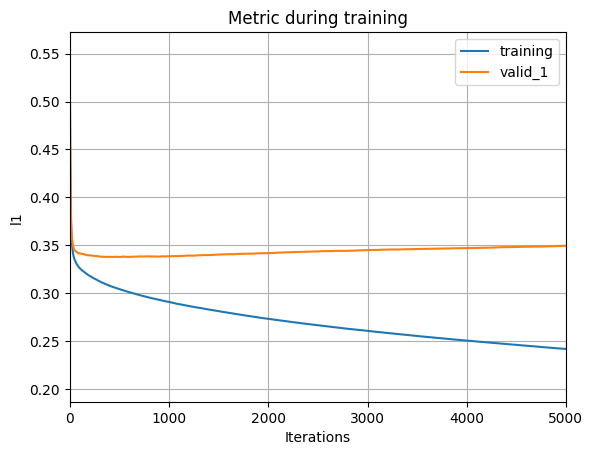

In [ ]:
lgb.plot_metric(lgb_model, 'l1')

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

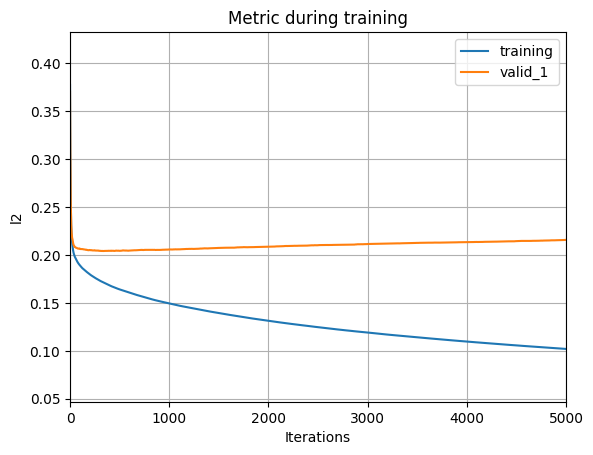

In [ ]:
lgb.plot_metric(lgb_model, 'l2')

In [ ]:
import joblib
# save model
joblib.dump(lgb_model, 'lgb.pkl')
# load model
# gbm_pickle = joblib.load('lgb.pkl')



['lgb.pkl']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy.ma.core import mean
pred = lgb_model.predict(test_data)
print (f"Mean Absolute Error: {mean_absolute_error(test_labels, pred)} \n Root Mean Squared Error: {np.sqrt(mean_squared_error(test_labels, pred))}")

Mean Absolute Error: 0.3365258433585255 
 Root Mean Squared Error: 0.4427626812671034


In [ ]:
# lgb_model.save_model('lgb_regressor.txt', num_iteration=lgb_model.best_iteration)
# model = lgb.Booster(model_file='lgb_classifier.txt')

In [ ]:
from sklearn.inspection import plot_partial_dependence

# Visualize partial dependence plots to interpret the model
fig, ax = plt.subplots(figsize=(10, 6))
plot_partial_dependence(best_model, train_data, features=['longitude', 'latitude', 'depth'], ax=ax)
plt.xlabel('Feature Value')
plt.ylabel('Partial Dependence')
plt.title('Partial Dependence Plots')
plt.tight_layout()
plt.show()

ImportError: ignored

In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=4aa86c94b4517de06ad623704e63ad0555a3ed869c5f30f2cd3025475cde1525
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
